# **Build a Transformer-Based Fake News Detection Chatbot**

In this project, you are required to design and deploy an intelligent chatbot that detects fake news using a transformer-based model. The primary aim is to apply your skills in data preprocessing, model integration with a transformer model, and deployment to create a modern AI-driven conversational system for fake news detection.

**Objective**

The chatbot should process user-input news text and predict whether it is fake or true based on provided datasets (true.csv and fake.csv). The system will serve as a practical application of transformer models to classify news and deliver results conversationally.


## **Data**

CSV files: true.csv and fake.csv, containing true and fake news articles, respectively. Unlike the previous assignment, which relied on keyword-based labeling without contextual information, this project requires preprocessing the data to create meaningful embeddings using a transformer model for classification.

### **Data Preprocessing**


*   Combine the true.csv and fake.csv datasets into a single dataset with labels (e.g., 1 for true, 0 for fake).
*   Clean the text data by removing special characters, punctuation, and stopwords, and perform tokenization suitable for the selected transformer model.
*   Ensure the dataset is balanced or address any imbalances during model training.
*   Split the dataset into training, validation, and test sets (e.g., 80-10-10 split).
*   For less model run time, use only top 100 rows of data from each csv file.(this is not mandatory but recommended)



In [ ]:
import pandas as pd
from google.colab import files

# Load the dataset
# We will total collect 12k data set randomly
print('Upload true.csv')
uploaded = files.upload()
true_file = list(uploaded.keys())[0]
true_df = pd.read_csv(true_file).sample(n=6000, random_state=42)
print('Upload fake.csv')
uploaded = files.upload()
fake_file = list(uploaded.keys())[0]
fake_df = pd.read_csv(fake_file).sample(n=6000, random_state=42)

# Add labels
true_df['label'] = 1
fake_df['label'] = 0

# Combine datasets
df = pd.concat([true_df, fake_df], ignore_index=True)

# Print them
print('\n')
print(df.head())

Upload true.csv


Saving True.csv to True.csv
Upload fake.csv


Saving Fake.csv to Fake.csv


                                               title  \
0  Europe rights watchdog says Turkey's emergency...   
1  Exclusive: Trump targets illegal immigrants wh...   
2  At G20 summit, Trump pledges $639 million in a...   
3  Ex-Christie associates lose bid for new trial ...   
4  Young blacks more open to Bernie Sanders' Whit...   

                                                text       subject  \
0  BRUSSELS (Reuters) - A leading European rights...     worldnews   
1  (Reuters) - In September 2014, Gilberto Velasq...  politicsNews   
2  HAMBURG (Reuters) - U.S. President Donald Trum...  politicsNews   
3  NEW YORK (Reuters) - A federal judge rejected ...  politicsNews   
4  ORANGEBURG, S.C. (Reuters) - If Democratic hop...  politicsNews   

                 date  label  
0    October 6, 2017       1  
1       June 9, 2017       1  
2       July 8, 2017       1  
3      March 2, 2017       1  
4  February 12, 2016       1  


In [ ]:
# Inspect the structure
print("Dataset structure:")
df.info()

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    12000 non-null  object
 1   text     12000 non-null  object
 2   subject  12000 non-null  object
 3   date     12000 non-null  object
 4   label    12000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 468.9+ KB


In [ ]:
# It has total 4 coloumn i.e. 'titile', 'text', 'subject', 'date', 'lable' & There is also no null value
# Drop unnecessary columns if any (e.g., 'title', 'subject', 'date' if not used for text)
df = df[['text', 'label']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12000 non-null  object
 1   label   12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


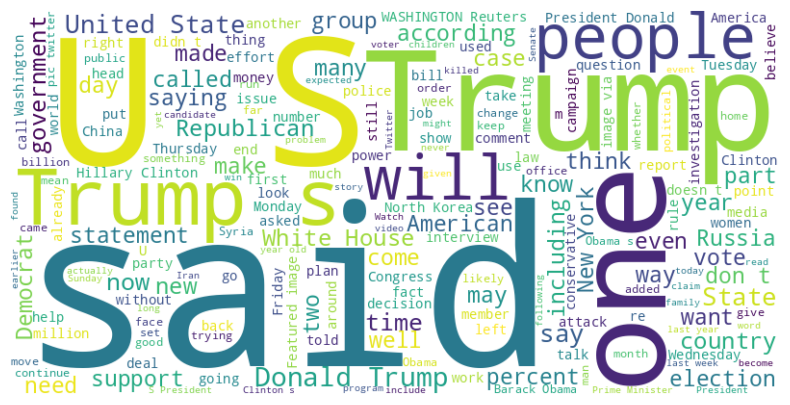

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
all_text = ' '.join(df['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print('\n')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


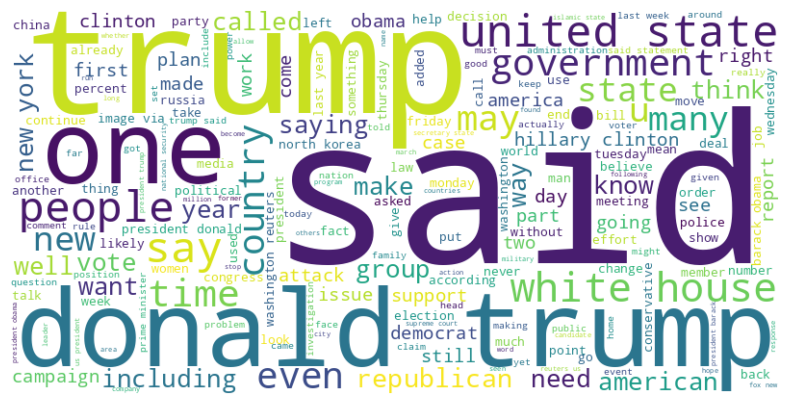

In [ ]:
import re
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split

nltk.download('stopwords')

# Text Cleaning Function
stop_words = set(stopwords.words('english'))
def clean_text(text):
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove urls from the tweets
  text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and punctuation
  text = text.lower() # Convert to lowercase
  text = ' '.join([word for word in text.split() if word not in stop_words]) # Remove stopwords
  return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Creatin a word cloud after cleaning
# Combine all text data into a single string
all_text = ' '.join(df['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print('\n')
plt.show()

In [ ]:
# Tokenization will be done later, specific to the chosen transformer model

# Data Balancing (optional for this reduced dataset, but good practice)
# Since we are using 5000 rows from each, the dataset is balanced.
# If using full datasets and they are unbalanced, we can use techniques like oversampling (SMOTE) or undersampling.

# Split the dataset
X = df['cleaned_text']
y = df['label']

# 8000-3000-1000 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=4000, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1000, random_state=42, stratify=y_temp)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 8000
Validation set size: 3000
Test set size: 1000


## **Model Selection and Integration**

You could use an open-source transformer model from Hugging Face's transformers library. For this project, we recommend using pre-trained models such as BERT (bert-base-uncased) or DistilBERT (distilbert-base-uncased), as they are well-suited for text classification tasks like fake news detection and are computationally efficient for training on T4 free GPU. BERT provides robust performance, while DistilBERT offers a lighter, faster alternative with comparable accuracy. You may use the model in an inference-only manner after fine-tuning by embedding the input text and generating predictions dynamically. We are open to innovative approaches, such as experimenting with model configurations or optimization techniques.


### **Steps for Model Integration**



*   Load the pre-trained BERT or DistilBERT model and tokenizer from Hugging Face.
*   Preprocess the text data to create input embeddings compatible with the selected model.
*   Fine-tune the model on the labeled dataset for binary classification (fake vs. true news).
*   Save the trained model for use in the chatbot.

In [ ]:
!pip install transformers torch -q
from transformers import BertTokenizer, BertModel, DistilBertTokenizer, DistilBertModel
import torch

# Choose a model (e.g., DistilBERT for efficiency)
MODEL_NAME_DISTILBERT = 'distilbert-base-uncased'
# Alternatively, for BERT:
MODEL_NAME_BERT = 'bert-base-uncased'

# Load tokenizer and model
tokenizer_distilbert = DistilBertTokenizer.from_pretrained(MODEL_NAME_DISTILBERT)
model_distilbert = DistilBertModel.from_pretrained(MODEL_NAME_DISTILBERT)
tokenizer_bert = BertTokenizer.from_pretrained(MODEL_NAME_BERT)
model_bert = BertModel.from_pretrained(MODEL_NAME_BERT)

# Define max sequence length
MAX_SEQ_LENGTH = 128 # or adjust based on typical article length

# Function to tokenize text data
def tokenize_data(tokenizer, data, max_len):
    return tokenizer.batch_encode_plus(
        data.tolist(),
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_token_type_ids=False,
        return_attention_mask=True,
        return_tensors='pt'
    )

# Tokenize using DistilBERT
train_encodings_distilbert = tokenize_data(tokenizer_distilbert, X_train, MAX_SEQ_LENGTH)
val_encodings_distilbert = tokenize_data(tokenizer_distilbert, X_val, MAX_SEQ_LENGTH)
test_encodings_distilbert = tokenize_data(tokenizer_distilbert, X_test, MAX_SEQ_LENGTH)

print("Training set tokenized using DistilBERT:", train_encodings_distilbert.keys())
print("Validation set tokenized tokenized using DistilBERT:", val_encodings_distilbert.keys())
print("Test set tokenized tokenized using DistilBERT:", test_encodings_distilbert.keys())

# Tokenize using BERT
train_encodings_bert = tokenize_data(tokenizer_bert, X_train, MAX_SEQ_LENGTH)
val_encodings_bert = tokenize_data(tokenizer_bert, X_val, MAX_SEQ_LENGTH)
test_encodings_bert = tokenize_data(tokenizer_bert, X_val, MAX_SEQ_LENGTH)

print("Training set tokenized using BERT:", train_encodings_bert.keys())
print("Validation set tokenized tokenized using BERT:", val_encodings_bert.keys())
print("Test set tokenized tokenized using BERT:", test_encodings_bert.keys())

# Convert labels to tensors
train_labels = torch.tensor(y_train.values)
val_labels = torch.tensor(y_val.values)
test_labels = torch.tensor(y_test.values)

# Example of a tokenized input
print('\nTokenization complete')
print("\nExample DistilBERT tokenized input (Train):")
print("Input IDs:", train_encodings_distilbert['input_ids'][0])
print("Attention Mask:", train_encodings_distilbert['attention_mask'][0])
print("\nExample BERT tokenized input (Train):")
print("Input IDs:", train_encodings_bert['input_ids'][0])
print("Attention Mask:", train_encodings_bert['attention_mask'][0])
print("\nLabel:", train_labels[0])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Training set tokenized using DistilBERT: KeysView({'input_ids': tensor([[  101,   102,     0,  ...,     0,     0,     0],
        [  101, 25317, 26665,  ...,  5424, 14041,   102],
        [  101,  2047,  2259,  ...,  8398,  2056,   102],
        ...,
        [  101, 12411,  2198,  ...,  4420,  5081,   102],
        [  101,  8398,  2211,  ..., 20110,  3366,   102],
        [  101,  2698, 29100,  ...,  2105,  2056,   102]]), 'attention_mask': tensor([[1, 1, 0,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])})
Validation set tokenized tokenized using DistilBERT: KeysView({'input_ids': tensor([[  101,  6874, 13749,  ...,     0,     0,     0],
        [  101, 10643, 18402,  ...,  2308,  2130,   102],
        [  101,  5522, 26665,  ...,  2095,  2048,   102],
        ...,
        [  101,  5522, 26665,  ...,  2784,  2859,   102],
        [  101

In [ ]:
# Create PyTorch Dataset -- to package tokenized inputs + labels
# Create DataLoaders -- to batch and shuffle the data

from torch.utils.data import Dataset, DataLoader
import torch

class NewsDataset(Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
      item = {key: val[idx] for key, val in self.encodings.items()}
      item['labels'] = self.labels[idx]
      return item

  def __len__(self):
    return len(self.labels)

# Define batch size
BATCH_SIZE = 16 # You can adjust this based on your GPU memory

# Create Datasets (using DistilBERT)
train_dataset_DistilBERT = NewsDataset(train_encodings_distilbert, train_labels)
val_dataset_DistilBERT = NewsDataset(val_encodings_distilbert, val_labels)
test_dataset_DistilBERT = NewsDataset(test_encodings_distilbert, test_labels)
# Create DataLoaders
train_loader_DistilBERT = DataLoader(train_dataset_DistilBERT, batch_size=BATCH_SIZE, shuffle=True)
val_loader_DistilBERT = DataLoader(val_dataset_DistilBERT, batch_size=BATCH_SIZE, shuffle=False)
test_loader_DistilBERT = DataLoader(test_dataset_DistilBERT, batch_size=BATCH_SIZE, shuffle=False)

print("\nPyTorch Datasets and DataLoaders created by DistilBERT.")
print(f"Train Dataset (DistilBERT): {len(train_dataset_DistilBERT)}")
print(f"Validation Dataset (DistilBERT): {len(val_dataset_DistilBERT)}")
print(f"Test Dataset (DistilBERT): {len(test_dataset_DistilBERT)}")


# Create Datasets (using BERT)
train_dataset_bert = NewsDataset(train_encodings_bert, train_labels)
val_dataset_bert = NewsDataset(val_encodings_bert, val_labels)
test_dataset_bert = NewsDataset(test_encodings_bert, test_labels)
# Create DataLoaders
train_loader_BERT = DataLoader(train_dataset_bert, batch_size=BATCH_SIZE, shuffle=True)
val_loader_BERT = DataLoader(val_dataset_bert, batch_size=BATCH_SIZE, shuffle=False)
test_loader_BERT = DataLoader(test_dataset_bert, batch_size=BATCH_SIZE, shuffle=False)

print("\nPyTorch Datasets and DataLoaders created by BERT.")
print(f"Train Dataset (BERT): {len(train_dataset_bert)}")
print(f"Validation Dataset (BERT): {len(val_dataset_bert)}")
print(f"Test Dataset (BERT): {len(test_dataset_bert)}")

# Example of iterating through a batch by DistilBERT
print("\nExample batch from DistilBERT train_loader:")
for batch in train_loader_DistilBERT:
  print("Batch Keys;", batch.keys())
  print("Input IDs shape:", batch['input_ids'].shape)
  print("Attention Mask shape:", batch['attention_mask'].shape)
  print("Labels shape:", batch['labels'].shape)
  break # Just show one batch

# Example for iterating through a batch by BERT
print("\nExample batch from BERT train_loader:")
for batch in train_loader_BERT:
  print("Batch Keys;", batch.keys())
  print("Input IDs shape:", batch['input_ids'].shape)
  print("Attention Mask shape:", batch['attention_mask'].shape)
  print("Labels shape:", batch['labels'].shape)
  break # Just show one batch
print('\n')


PyTorch Datasets and DataLoaders created by DistilBERT.
Train Dataset (DistilBERT): 8000
Validation Dataset (DistilBERT): 3000
Test Dataset (DistilBERT): 1000

PyTorch Datasets and DataLoaders created by BERT.
Train Dataset (BERT): 8000
Validation Dataset (BERT): 3000
Test Dataset (BERT): 1000

Example batch from DistilBERT train_loader:
Batch Keys; dict_keys(['input_ids', 'attention_mask', 'labels'])
Input IDs shape: torch.Size([16, 128])
Attention Mask shape: torch.Size([16, 128])
Labels shape: torch.Size([16])

Example batch from BERT train_loader:
Batch Keys; dict_keys(['input_ids', 'attention_mask', 'labels'])
Input IDs shape: torch.Size([16, 128])
Attention Mask shape: torch.Size([16, 128])
Labels shape: torch.Size([16])




In [ ]:
# # ================================================
#  TRAINING SETUP FOR BERT AND DISTILBERT MODELS
# ================================================
# This section sets up training for two transformer models:
#   1. DistilBERT (distilbert-base-uncased)
#   2. BERT (bert-base-uncased)
#
# Why both?
# We want to compare the performance of a lightweight model (DistilBERT)
# with a full transformer (BERT) on the same fake news classification task.
#
# Each model has its own:
#   - Tokenizer
#   - Tokenized input encodings
#   - DataLoaders (train and validation)
#
# The process for each model includes:
#    Loading the pre-trained model with classification head
#    Initializing the optimizer (AdamW)
#    Configuring a linear learning rate scheduler
#    Passing these to a shared train_model function
#
# This allows us to run the same training and evaluation logic
# on both models in a clean, reusable way.
#
#  Outputs:
# For each model, we will print:
#   - Training loss per epoch
#   - Validation accuracy after each epoch
#   - (Later: Save best models, compute F1-score, etc.)

In [ ]:
from transformers import DistilBertForSequenceClassification, BertForSequenceClassification
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score
import numpy as np

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load the models with a classification head
# DistilBERT
model_distilbert_classifier = DistilBertForSequenceClassification.from_pretrained(MODEL_NAME_DISTILBERT, num_labels=2)
model_distilbert_classifier.to(device)

# BERT
model_bert_classifier = BertForSequenceClassification.from_pretrained(MODEL_NAME_BERT, num_labels=2)
model_bert_classifier.to(device)

# Define the optimizer for each model
# DistilBERT
optimizer_distilbert = AdamW(model_distilbert_classifier.parameters(), lr=2e-5) # You can adjust the learning rate

# BERT
optimizer_bert = AdamW(model_bert_classifier.parameters(), lr=2e-5) # You can adjust the learning rate


# Define the number of training epochs
EPOCHS = 3 # You can adjust this

# Calculate total training steps for the scheduler
total_steps_distilbert = len(train_loader_DistilBERT) * EPOCHS
total_steps_bert = len(train_loader_BERT) * EPOCHS

# Create the learning rate scheduler for each model
scheduler_distilbert = get_linear_schedule_with_warmup(optimizer_distilbert, num_warmup_steps=0, num_training_steps=total_steps_distilbert)
scheduler_bert = get_linear_schedule_with_warmup(optimizer_bert, num_warmup_steps=0, num_training_steps=total_steps_bert)


# Define the training function
def train_model(model, dataloader, optimizer, scheduler, device):
  model.train()
  total_loss = 0
  for step, batch in enumerate(dataloader):
    # Move batch to GPU
    batch = {k: v.to(device) for k, v in batch.items()}

    # Forward pass
    outputs = model(**batch)
    loss = outputs.loss

    # Backward pass and optimize
    loss.backward()
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

    total_loss += loss.item()

  avg_train_loss = total_loss / len(dataloader)
  return avg_train_loss

# Define the evaluation function
def evaluate_model(model, dataloader, device):
  model.eval()
  predictions, true_labels = [], []
  total_eval_loss = 0

  with torch.no_grad():
    for batch in dataloader:
      batch = {k: v.to(device) for k, v in batch.items()}
      outputs = model(**batch)
      loss = outputs.loss
      total_eval_loss += loss.item()

      logits = outputs.logits
      preds = torch.argmax(logits, dim=1).flatten()

      predictions.extend(preds.cpu().numpy())
      true_labels.extend(batch['labels'].cpu().numpy())

  avg_eval_loss = total_eval_loss / len(dataloader)
  accuracy = accuracy_score(true_labels, predictions)
  return avg_eval_loss, accuracy

# ================================================
#  START TRAINING
# ================================================

print("\nStarting training for DistilBERT...")
for epoch in range(EPOCHS):
  print(f"\nEpoch {epoch+1}/{EPOCHS}")

  # Train phase
  train_loss = train_model(model_distilbert_classifier, train_loader_DistilBERT, optimizer_distilbert, scheduler_distilbert, device)
  print(f"  Train Loss: {train_loss:.4f}")

  # Evaluation phase
  val_loss, val_accuracy = evaluate_model(model_distilbert_classifier, val_loader_DistilBERT, device)
  print(f"  Validation Loss: {val_loss:.4f}")
  print(f"  Validation Accuracy: {val_accuracy:.4f}")

print("\nDistilBERT training complete.")

print("\nStarting training for BERT...")
for epoch in range(EPOCHS):
  print(f"\nEpoch {epoch+1}/{EPOCHS}")

  # Train phase
  train_loss = train_model(model_bert_classifier, train_loader_BERT, optimizer_bert, scheduler_bert, device)
  print(f"  Train Loss: {train_loss:.4f}")

  # Evaluation phase
  val_loss, val_accuracy = evaluate_model(model_bert_classifier, val_loader_BERT, device)
  print(f"  Validation Loss: {val_loss:.4f}")
  print(f"  Validation Accuracy: {val_accuracy:.4f}")

print("\nBERT training complete.")

Using device: cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Starting training for DistilBERT...

Epoch 1/3
  Train Loss: 0.0455
  Validation Loss: 0.0099
  Validation Accuracy: 0.9980

Epoch 2/3
  Train Loss: 0.0106
  Validation Loss: 0.0058
  Validation Accuracy: 0.9987

Epoch 3/3
  Train Loss: 0.0043
  Validation Loss: 0.0044
  Validation Accuracy: 0.9990

DistilBERT training complete.

Starting training for BERT...

Epoch 1/3
  Train Loss: 0.0465
  Validation Loss: 0.0055
  Validation Accuracy: 0.9983

Epoch 2/3
  Train Loss: 0.0051
  Validation Loss: 0.0057
  Validation Accuracy: 0.9983

Epoch 3/3
  Train Loss: 0.0019
  Validation Loss: 0.0027
  Validation Accuracy: 0.9993

BERT training complete.


In [ ]:
# ================================================================
#  MODEL EVALUATION — METRICS BEYOND ACCURACY
# ================================================================

# Now that training is complete for both BERT and DistilBERT models,
# it's important to evaluate their performance using more detailed metrics.

#  Metrics we'll use:
#   - Confusion Matrix: Visualizes TP, FP, TN, FN
#   - Classification Report: Includes Precision, Recall, F1-score
#   - Optional: Save predictions and compare them with ground truth

#  Apply these evaluations to:
#   - Validation set (primary use for tuning)

#  These results help decide:
#   - Which model to keep (BERT vs DistilBERT)
#   - Whether tuning or early stopping is needed
#   - What improvements can be made before deployment


--- DistilBERT Evaluation ---

Evaluating on Validation Set:

Classification Report (Validation):
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      1500
        True       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Confusion Matrix (Validation):


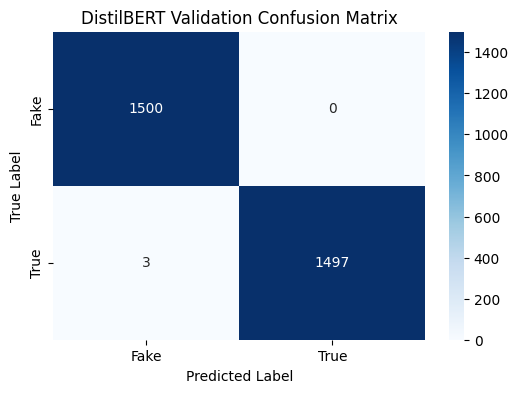


--- BERT Evaluation ---

Evaluating on Validation Set:

Classification Report (Validation):
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      1500
        True       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Confusion Matrix (Validation):


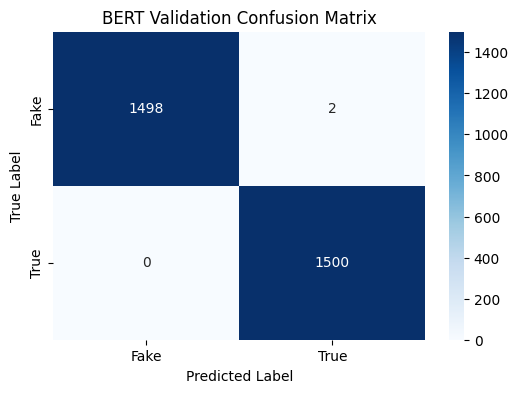


Model evaluation complete.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Function to get predictions for a dataset
def get_predictions(model, dataloader, device):
  model.eval()
  predictions = []
  true_labels = []
  with torch.no_grad():
    for batch in dataloader:
      batch = {k: v.to(device) for k, v in batch.items()}
      outputs = model(**batch)
      logits = outputs.logits
      preds = torch.argmax(logits, dim=1).flatten()
      predictions.extend(preds.cpu().numpy())
      true_labels.extend(batch['labels'].cpu().numpy())
  return true_labels, predictions

# --- Evaluate DistilBERT ---
print("\n--- DistilBERT Evaluation ---")

# Evaluation on Validation set
print("\nEvaluating on Validation Set:")
val_true_distilbert, val_preds_distilbert = get_predictions(model_distilbert_classifier, val_loader_DistilBERT, device)

print("\nClassification Report (Validation):")
print(classification_report(val_true_distilbert, val_preds_distilbert, target_names=['Fake', 'True']))

print("\nConfusion Matrix (Validation):")
cm_val_distilbert = confusion_matrix(val_true_distilbert, val_preds_distilbert)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val_distilbert, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DistilBERT Validation Confusion Matrix')
plt.show()

# --- Evaluate BERT ---
print("\n--- BERT Evaluation ---")

# Evaluation on Validation set
print("\nEvaluating on Validation Set:")
val_true_bert, val_preds_bert = get_predictions(model_bert_classifier, val_loader_BERT, device)

print("\nClassification Report (Validation):")
print(classification_report(val_true_bert, val_preds_bert, target_names=['Fake', 'True']))

print("\nConfusion Matrix (Validation):")
cm_val_bert = confusion_matrix(val_true_bert, val_preds_bert)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val_bert, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('BERT Validation Confusion Matrix')
plt.show()


print("\nModel evaluation complete.")


In [ ]:
# ================================================================
#  TRAINING IMPROVEMENT & MONITORING
# ================================================================

# In this phase, we enhance the training process to improve model performance
# and avoid overfitting using dynamic monitoring and controls.

#  Purpose of This Phase:
#   - Track training and validation loss across epochs
#   - Visualize model learning progress using loss curves
#   - Implement early stopping to prevent overfitting and reduce wasteful training

# 🛠 What We’ll Add:
#   1. *Loss Recording* for each epoch during training
#   2. *Matplotlib Plots* for Training vs Validation Loss
#   3. *Early Stopping Mechanism* based on validation loss (with patience)

#  Why This Matters:
#   - Helps you identify underfitting/overfitting visually
#   - Stops training automatically when further improvements stall
#   - Makes training more efficient and models more robust

#  Outcome:
#   - More stable, optimized models
#   - Visual insights into training dynamics
#   - Readiness for confident evaluation and deployment in further


Starting training for DistilBERT with monitoring...

Epoch 1/5 (DistilBERT)
  Train Loss: 0.0029
  Validation Loss: 0.0044
  Validation Accuracy: 0.9990
Validation loss decreased (inf --> 0.004353). Saving model...

Epoch 2/5 (DistilBERT)
  Train Loss: 0.0031
  Validation Loss: 0.0044
  Validation Accuracy: 0.9990
Validation loss unchangrd (within tolerance); no update

Epoch 3/5 (DistilBERT)
  Train Loss: 0.0030
  Validation Loss: 0.0044
  Validation Accuracy: 0.9990
Validation loss unchangrd (within tolerance); no update

Epoch 4/5 (DistilBERT)
  Train Loss: 0.0033
  Validation Loss: 0.0044
  Validation Accuracy: 0.9990
Validation loss unchangrd (within tolerance); no update

Epoch 5/5 (DistilBERT)
  Train Loss: 0.0031
  Validation Loss: 0.0044
  Validation Accuracy: 0.9990
Validation loss unchangrd (within tolerance); no update

DistilBERT training complete.

Starting training for BERT with monitoring...

Epoch 1/5 (BERT)
  Train Loss: 0.0015
  Validation Loss: 0.0027
  Validation 

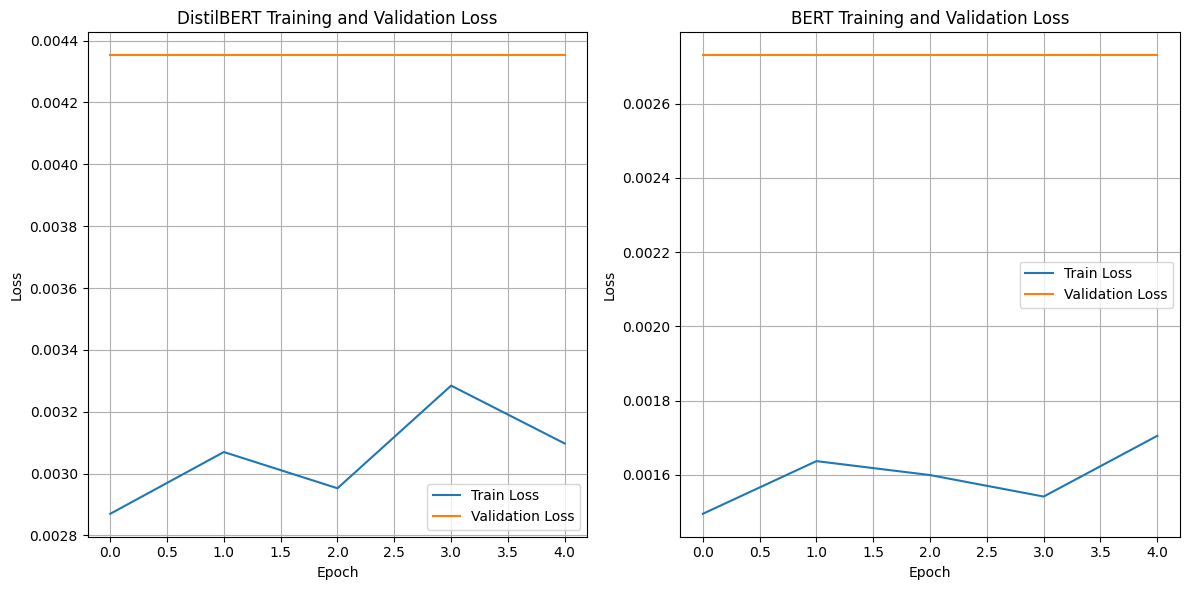


Loss curve plotting complete.

--- Final Evaluation on Test Set ---

Evaluating DistilBERT on Test Set:

Classification Report (Test Set - DistilBERT):
              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00       500
        True       1.00      0.99      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix (Test Set - DistilBERT):


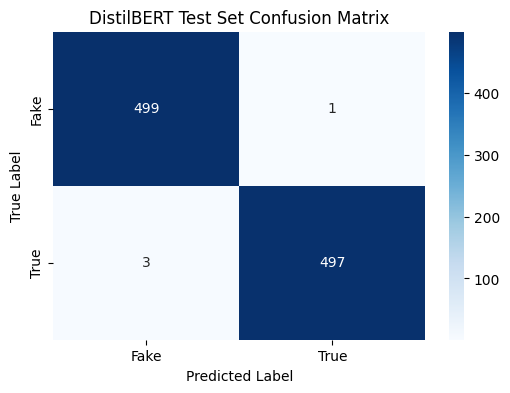


Evaluating BERT on Test Set:

Classification Report (Test Set - BERT):
              precision    recall  f1-score   support

        Fake       0.49      0.49      0.49       500
        True       0.49      0.49      0.49       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000


Confusion Matrix (Test Set - BERT):


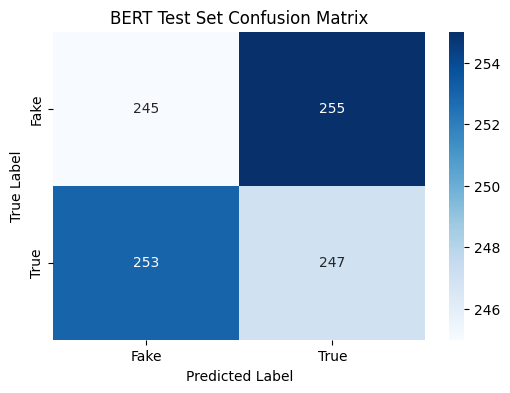


Final evaluation complete.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Redefine the training function to record loss
def train_model_with_monitoring(model, dataloader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    for step, batch in enumerate(dataloader):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        total_loss += loss.item()
    return total_loss / len(dataloader)

# Redefine the evaluation function to return loss as well
def evaluate_model_with_monitoring(model, dataloader, device):
    model.eval()
    predictions, true_labels = [], []
    total_eval_loss = 0

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            total_eval_loss += loss.item()

            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).flatten()

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(batch['labels'].cpu().numpy())

    avg_eval_loss = total_eval_loss / len(dataloader)
    accuracy = accuracy_score(true_labels, predictions)
    return avg_eval_loss, accuracy

# Implement Early Stopping
class EarlyStopping:
    def __init__(self, patience=3, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.inf
        self.delta = delta

    def __call__(self, val_loss, model, path):
        score = -val_loss
        eps = 1e-5 # Tolerance for float comparison
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model, path)
        elif score < self.best_score + self.delta and (val_loss - self.val_loss_min)> eps:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        elif abs(val_loss - self.val_loss_min)> eps:
            self.best_score = score
            self.save_checkpoint(val_loss, model, path)
            self.counter = 0
        else:
          # No actual change; do not save
          if self.verbose:
            print('Validation loss unchangrd (within tolerance); no update')

    def save_checkpoint(self, val_loss, model, path):
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...')
        # Save the model
        torch.save(model.state_dict(), path)
        self.val_loss_min = val_loss

# Define training epochs
EPOCHS = 5  # Increase epochs as we have early stopping

# Initialize Early Stopping
early_stopping_distilbert = EarlyStopping(patience=3, verbose=True) # Adjust patience
early_stopping_bert = EarlyStopping(patience=3, verbose=True) # Adjust patience

# Lists to store training and validation loss
train_losses_distilbert = []
val_losses_distilbert = []
train_losses_bert = []
val_losses_bert = []


# ================================================
#  START TRAINING WITH MONITORING AND EARLY STOPPING
# ================================================

print("\nStarting training for DistilBERT with monitoring...")
for epoch in range(EPOCHS):
    if early_stopping_distilbert.early_stop:
        print("Early stopping triggered for DistilBERT.")
        break

    print(f"\nEpoch {epoch+1}/{EPOCHS} (DistilBERT)")

    # Train phase
    train_loss = train_model_with_monitoring(model_distilbert_classifier, train_loader_DistilBERT, optimizer_distilbert, scheduler_distilbert, device)
    train_losses_distilbert.append(train_loss)
    print(f"  Train Loss: {train_loss:.4f}")

    # Evaluation phase
    val_loss, val_accuracy = evaluate_model_with_monitoring(model_distilbert_classifier, val_loader_DistilBERT, device)
    val_losses_distilbert.append(val_loss)
    print(f"  Validation Loss: {val_loss:.4f}")
    print(f"  Validation Accuracy: {val_accuracy:.4f}")

    # Check for early stopping
    early_stopping_distilbert(val_loss, model_distilbert_classifier, 'distilbert_best.pt')


print("\nDistilBERT training complete.")


print("\nStarting training for BERT with monitoring...")
for epoch in range(EPOCHS):
    if early_stopping_bert.early_stop:
        print("Early stopping triggered for BERT.")
        break

    print(f"\nEpoch {epoch+1}/{EPOCHS} (BERT)")

    # Train phase
    train_loss = train_model_with_monitoring(model_bert_classifier, train_loader_BERT, optimizer_bert, scheduler_bert, device)
    train_losses_bert.append(train_loss)
    print(f"  Train Loss: {train_loss:.4f}")

    # Evaluation phase
    val_loss, val_accuracy = evaluate_model_with_monitoring(model_bert_classifier, val_loader_BERT, device)
    val_losses_bert.append(val_loss)
    print(f"  Validation Loss: {val_loss:.4f}")
    print(f"  Validation Accuracy: {val_accuracy:.4f}")

    # Check for early stopping
    early_stopping_bert(val_loss, model_bert_classifier, 'bert_best.pt')


print("\nBERT training complete.")

# ================================================
#  VISUALIZE LOSS CURVES
# ================================================

print("\nPlotting Loss Curves...")

plt.figure(figsize=(12, 6))

# DistilBERT Loss Curves
plt.subplot(1, 2, 1)
plt.plot(train_losses_distilbert, label='Train Loss')
plt.plot(val_losses_distilbert, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('DistilBERT Training and Validation Loss')
plt.legend()
plt.grid(True)

# BERT Loss Curves
plt.subplot(1, 2, 2)
plt.plot(train_losses_bert, label='Train Loss')
plt.plot(val_losses_bert, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BERT Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nLoss curve plotting complete.")

# ================================================
#  FINAL EVALUATION ON TEST SET (Optional but Recommended)
# ================================================
# After selecting the best epoch based on validation performance
# (implicitly handled by Early Stopping if we saved the best model),
# we perform a final evaluation on the unseen test set.

model_distilbert_classifier.load_state_dict(torch.load('distilbert_best.pt'))
model_bert_classifier.load_state_dict(torch.load('bert_best.pt'))
print("\n--- Final Evaluation on Test Set ---")

# Evaluate DistilBERT on Test Set
print("\nEvaluating DistilBERT on Test Set:")
test_true_distilbert, test_preds_distilbert = get_predictions(model_distilbert_classifier, test_loader_DistilBERT, device)
print("\nClassification Report (Test Set - DistilBERT):")
print(classification_report(test_true_distilbert, test_preds_distilbert, target_names=['Fake', 'True']))
print("\nConfusion Matrix (Test Set - DistilBERT):")
cm_test_distilbert = confusion_matrix(test_true_distilbert, test_preds_distilbert)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_distilbert, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DistilBERT Test Set Confusion Matrix')
plt.show()

# Evaluate BERT on Test Set
print("\nEvaluating BERT on Test Set:")
test_true_bert, test_preds_bert = get_predictions(model_bert_classifier, test_loader_BERT, device)
print("\nClassification Report (Test Set - BERT):")
print(classification_report(test_true_bert, test_preds_bert, target_names=['Fake', 'True']))
print("\nConfusion Matrix (Test Set - BERT):")
cm_test_bert = confusion_matrix(test_true_bert, test_preds_bert)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_bert, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('BERT Test Set Confusion Matrix')
plt.show()

print("\nFinal evaluation complete.")

In [ ]:
# ============================
# Save the Best Models & clearly DistilBERT is much much better than BERT model
# ============================

# Save DistilBERT model
distilbert_save_path = 'best_model_distilbert.pt'
torch.save(model_distilbert_classifier.state_dict(), distilbert_save_path)
print(f"Best DistilBERT model saved to: {distilbert_save_path}")

Best DistilBERT model saved to: best_model_distilbert.pt


In [ ]:
# ================================================================
#  DistilBERT Final Inference & Evaluation Pipeline
# ================================================================
#
# Context:
#   • We are using only the fine-tuned DistilBERT model.
#   • It has already been saved as 'best_distilbert_best.pt'.
#   • The goal is to run inference on the test set,
#     report confidence per prediction, and visualize performance.
#   • We also save it as a path as distilbert_save _path.
#   • Apply model.eval()
#
# ----------------------------------------------------------------
# 1  Inference on Test Set
# ----------------------------------------------------------------
#   • Loop through test_loader_DistilBERT with torch.no_grad().
#   • For each batch:
#         – Send inputs to device
#         – Get logits = model(**batch).logits
#   • Apply softmax on logits to get probabilities.
#   • Store predicted label using argmax, and the associated
#     confidence using max(probabilities) × 100.
#
# ----------------------------------------------------------------
# 2  Generate Evaluation Report
# ----------------------------------------------------------------
#   • Print classification_report() from sklearn:
#       – Shows Precision, Recall, F1 for 'Fake' and 'True'.
#   • Plot confusion matrix with Seaborn heatmap.
#
# ----------------------------------------------------------------
# 3  ROC-AUC Curve & Score
# ----------------------------------------------------------------
#   • Use true labels and the probability of class '1' (True).
#   • Call roc_curve() and auc() from sklearn.metrics.
#   • Plot ROC curve and overlay random baseline.
#   • Display AUC score in the legend.
#
# ----------------------------------------------------------------
# 4  (Optional) Show Confidence Example
# ----------------------------------------------------------------
#   • For a few random or selected samples:
#         print(f"Predicted: {label} | Confidence: {conf:.2f} %")
#   • Useful for chatbot explanation or UI feedback.
#
#  This completes the test-time inference & evaluation pipeline
#  using your trained and saved DistilBERT model.
# ================================================================

Using device: cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Starting inference on Test Set (DistilBERT)...
Inference on Test Set complete.

--- DistilBERT Final Evaluation on Test Set ---

Classification Report (Test Set):
              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00       500
        True       1.00      0.99      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix (Test Set):


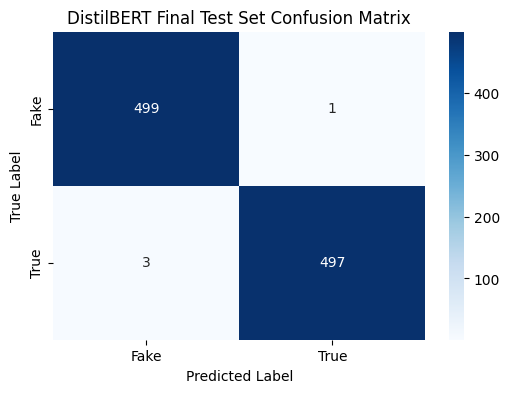

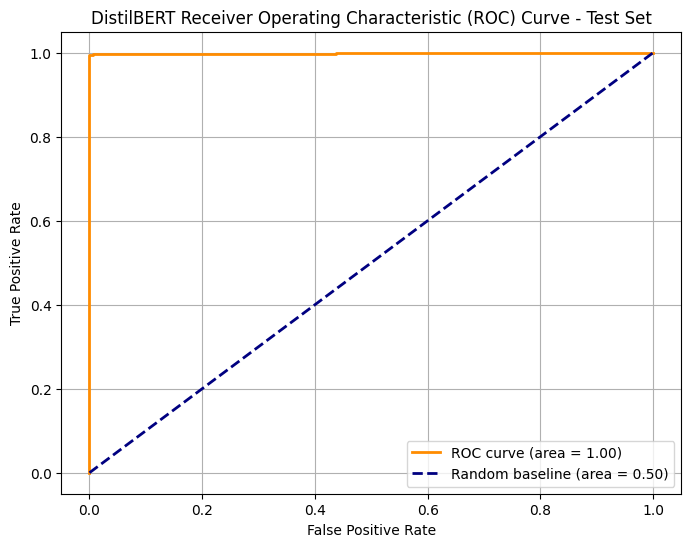


DistilBERT ROC-AUC Score: 0.9989

--- Confidence Examples (DistilBERT Test Set) ---
Sample 1: True Label: True | Predicted: True | Confidence: 99.95 %
Sample 2: True Label: True | Predicted: True | Confidence: 99.97 %
Sample 3: True Label: True | Predicted: True | Confidence: 99.96 %
Sample 4: True Label: True | Predicted: True | Confidence: 99.97 %
Sample 5: True Label: Fake | Predicted: Fake | Confidence: 99.94 %

DistilBERT Final Inference & Evaluation Pipeline complete.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# Load the best DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained(MODEL_NAME_DISTILBERT, num_labels=2)
model.load_state_dict(torch.load('best_model_distilbert.pt')) # Use the path where the best model was saved
model.to(device)
model.eval() # Set the model to evaluation mode

# 1. Inference on Test Set & Collect Predictions, True Labels, and Confidences
all_predictions = []
all_true_labels = []
all_confidences = []
all_probabilities = [] # To store probabilities for ROC-AUC

print("\nStarting inference on Test Set (DistilBERT)...")

with torch.no_grad():
    for batch in test_loader_DistilBERT:
        batch = {k: v.to(device) for k, v in batch.items()}

        # Get logits
        outputs = model(**batch)
        logits = outputs.logits

        # Apply softmax to get probabilities
        probabilities = torch.softmax(logits, dim=1)

        # Get predicted label (argmax) and confidence (max probability)
        confidences, preds = torch.max(probabilities, dim=1)

        labels = batch['labels']
        all_predictions.extend(preds.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())
        all_confidences.extend(confidences.cpu().numpy())
        all_probabilities.extend(probabilities.cpu().numpy())

print("Inference on Test Set complete.")

# 2. Generate Evaluation Report
print("\n--- DistilBERT Final Evaluation on Test Set ---")

# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(all_true_labels, all_predictions, target_names=['Fake', 'True']))

# Confusion Matrix
print("\nConfusion Matrix (Test Set):")
cm_test_final = confusion_matrix(all_true_labels, all_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_final, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DistilBERT Final Test Set Confusion Matrix')
plt.show()
print('\n')

# 3. ROC-AUC Curve & Score
# We need the probabilities of the positive class (class 1, 'True') for ROC-AUC
probs_true = [p[1] for p in all_probabilities]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(all_true_labels, probs_true)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random baseline (area = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DistilBERT Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nDistilBERT ROC-AUC Score: {roc_auc:.4f}")

# 4. Show Confidence Example
print("\n--- Confidence Examples (DistilBERT Test Set) ---")
num_examples_to_show = 5
for i in range(num_examples_to_show):
    true_label = 'True' if all_true_labels[i] == 1 else 'Fake'
    predicted_label = 'True' if all_predictions[i] == 1 else 'Fake'
    confidence_percent = all_confidences[i] * 100
    print(f"Sample {i+1}: True Label: {true_label} | Predicted: {predicted_label} | Confidence: {confidence_percent:.2f} %")

print("\nDistilBERT Final Inference & Evaluation Pipeline complete.")

Now we can implement FAISS for better semnatic serach method..

In [ ]:
# FAISS implementation
# 1. Get BERT/DistilBERT embeddings of all known tweets/articles
# 2. Index them using FAISS (flat or IVF, optional GPU)
# 3. Save the index
# 4. For new input:
#   a. Get its embedding
#   b. Query FAISS for top-k similar vectors
#   c. Use these results for:
#      - Insight/explanation
#      - Supporting final prediction
#      - Response generation (in chatbot)

In [ ]:
import numpy as np
!pip install faiss-cpu # or Use faiss-gpu
import faiss
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define model name and max sequence length
MODEL_NAME_DISTILBERT = 'distilbert-base-uncased'
MAX_SEQ_LENGTH = 128 # or adjust based on typical article length

# Load tokenizer and model
tokenizer_distilbert = DistilBertTokenizer.from_pretrained(MODEL_NAME_DISTILBERT)
model_distilbert_classifier = DistilBertForSequenceClassification.from_pretrained(MODEL_NAME_DISTILBERT, num_labels=2)
model_distilbert_classifier.load_state_dict(torch.load('best_model_distilbert.pt')) # Load the best trained model
model_distilbert_classifier.to(device)


# 1. Get Embeddings for the Training Data
print("\nGenerating embeddings for the training data using DistilBERT...")

# Use the trained model (in evaluation mode)
model_distilbert_classifier.eval()

train_embeddings = []

with torch.no_grad():
    for batch in train_loader_DistilBERT:
        batch = {k: v.to(device) for k, v in batch.items() if k in ['input_ids', 'attention_mask']} # Only need inputs
        outputs = model_distilbert_classifier.distilbert(**batch) # Get embeddings from the base model
        # We take the [CLS] token embedding as the sentence representation
        embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        train_embeddings.append(embeddings)

train_embeddings = np.concatenate(train_embeddings, axis=0)
print(f"Generated {train_embeddings.shape[0]} embeddings of size {train_embeddings.shape[1]}")

# 2. Index them using FAISS
embedding_dim = train_embeddings.shape[1]

# Choose an index type: Flat (simple, good for smaller datasets)
index = faiss.IndexFlatL2(embedding_dim) # L2 distance is common for embeddings

# Add the embeddings to the index
index.add(train_embeddings)
print(f"FAISS index created and populated with {index.ntotal} vectors.")

# 3. Save the index
index_path = 'faiss_index_distilbert.faiss'
faiss.write_index(index, index_path)
print(f"FAISS index saved to: {index_path}")

# --- Load the index for later use ---
loaded_index = faiss.read_index(index_path)
print(f"Loaded index contains {loaded_index.ntotal} vectors.")

# 4. For a new input (example using a sample from the test set)
def find_similar_articles(query_text, model, tokenizer, faiss_index, k=5):
    # a. Get its embedding
    model.eval()
    with torch.no_grad():
        inputs = tokenizer(
            [query_text],
            max_length=MAX_SEQ_LENGTH,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        ).to(device)

        # Get embedding from the base model
        outputs = model.distilbert(**inputs)
        query_embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()

    # b. Query FAISS for top-k similar vectors
    distances, indices = faiss_index.search(query_embedding, k)

    # c. Use these results
    print(f"\nSearching for top {k} similar articles to: '{query_text[:100]}...'")
    print("\nTop K similar articles (indices from the training data):")
    # Map indices back to original text and label if needed
    # For this example, let's just show the indices and distances.
    results = []
    for i in range(k):
        train_data_index = indices[0][i] # indices is 2D array, get first row
        distance = distances[0][i]
        # Retrieve original text and label from the training set
        # Make sure the order of train_embeddings matches the order of X_train/y_train
        original_text = X_train.iloc[train_data_index]
        original_label = "True" if y_train.iloc[train_data_index] == 1 else "Fake"

        print(f"  Rank {i+1}: Index {train_data_index}, Distance {distance:.4f}, Label: {original_label}")
        print(f"    Text: {original_text[:200]}...") # Print a snippet of the text
        results.append({
            'train_data_index': train_data_index,
            'distance': distance,
            'label': original_label,
            'text': original_text
        })
    return results

# Example usage with a sample from the test set
sample_index = 0 # You can change this index
query_text = X_test.iloc[sample_index]
true_label = "True" if y_test.iloc[sample_index] == 1 else "Fake"
print(f"\nQuerying with a sample from the Test Set (Index {sample_index}). True label: {true_label}")

# Use the *classifier* model to get the base DistilBERT embeddings
# (The .distilbert attribute holds the base model)
similar_results = find_similar_articles(query_text, model_distilbert_classifier, tokenizer_distilbert, index, k=5)

print("\nFAISS implementation steps complete.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 27.3 MB/s eta 0:00:00


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Generating embeddings for the training data using DistilBERT...
Generated 8000 embeddings of size 768
FAISS index created and populated with 8000 vectors.
FAISS index saved to: faiss_index_distilbert.faiss
Loaded index contains 8000 vectors.

Querying with a sample from the Test Set (Index 0). True label: True

Searching for top 5 similar articles to: 'reuters director democratic presidential candidate hillary clintons asian american pacific islander ...'

Top K similar articles (indices from the training data):
  Rank 1: Index 6425, Distance 11.8836, Label: True
    Text: berlin reuters support germany centerleft social democrats spd slumped lowest level year days election conservative chancellor angela merkel looks set win fourth term poll showed thursday weekly surve...
  Rank 2: Index 7854, Distance 12.7647, Label: Fake
    Text: today fiasco came courtesy house intel chair devin nunes enough convince anyone conduct credible investigation whether trump teams colluded russia nunes 

In [ ]:
# The 'similar_results' can now be used for insights:
# - Are the most similar articles predominantly 'True' or 'Fake'?
# - Does the similarity align with the model's final prediction for the query_text?
# - The retrieved similar articles could serve as supporting evidence in a chatbot response.

In [ ]:
# ================================================
#  Hybrid Prediction Pipeline (DistilBERT + FAISS)
# ================================================

# 1. Load the best saved DistilBERT model
#    Set it to evaluation mode and move to GPU/CPU.

# 2. For each example in the test set:
#     a. Run inference through DistilBERT classifier
#        - Get predicted label (0 or 1)
#        - Get softmax confidence score of prediction
#
#     b. Retrieve top-k similar vectors from FAISS index
#        - Compute semantic neighbors using the query embedding
#        - Collect their true labels from training set
#
#     c. Perform majority voting on FAISS neighbors
#        - Count how many are 'True' vs 'Fake'
#        - Decide FAISS label as the majority class
#        - Compute FAISS confidence = (majority count / k)

# 3. Combine predictions (Hybrid Decision)
#     a. If DistilBERT and FAISS agree:
#        - Use that as final label
#        - Confidence = average of model + FAISS confidence
#
#     b. If they disagree:
#        - Give 80% weight to classifier
#        - Give 20% weight to FAISS
#        - Final label = label with higher weighted score
#        - Confidence = 0.8 * model_conf + 0.2 * faiss_conf

# 4. Store or print results per test instance:
#     - True label
#     - Classifier label + confidence
#     - FAISS label + confidence
#     - Final hybrid label + final confidence
#     - (Optional) Top 5 most similar article snippets for explanation

# 5. After loop completes, you can evaluate:
#     - Accuracy of hybrid model
#     - Classification report
#     - Confusion matrix
#     - ROC-AUC score

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loaded FAISS index containing 8000 vectors.

Starting Hybrid Prediction Pipeline...
Hybrid Prediction Pipeline complete.
Processed 1000 test examples.

--- Hybrid Model Evaluation ---

Hybrid Model Accuracy on Test Set: 0.9960

Hybrid Classification Report (Test Set):
              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00       500
        True       1.00      0.99      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Hybrid Confusion Matrix (Test Set):


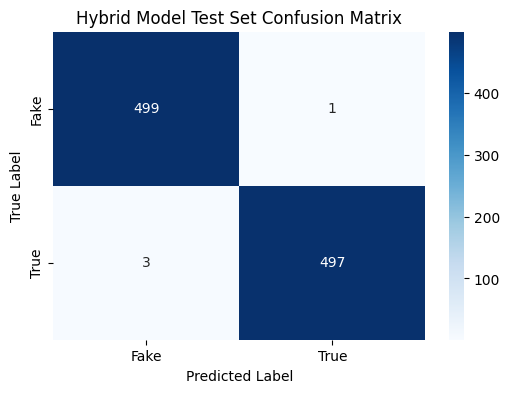

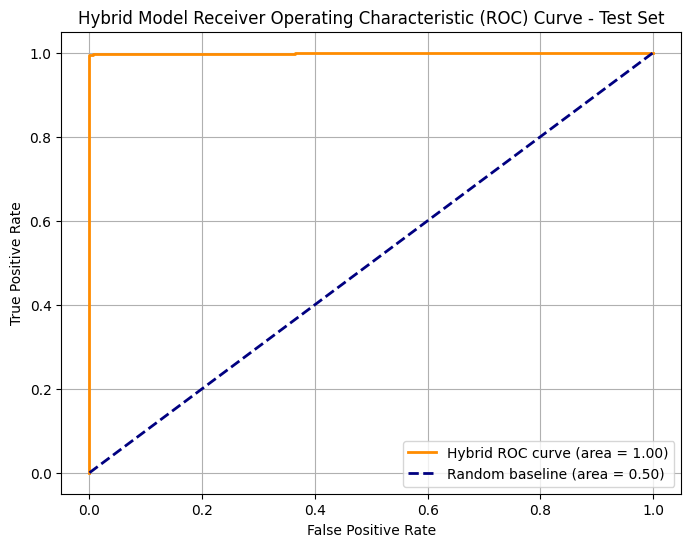




Hybrid Model ROC-AUC Score: 0.9986

--- Example Hybrid Predictions ---

Example Index: 0
  Query: reuters director democratic presidential candidate hillary clintons asian american pacific islander ...
  True Label: True
  Classifier: True (Conf: 0.9995)
  FAISS Neighbors: [np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0)] (Conf: 0.6000)
  Hybrid Prediction: True (Conf: 0.7998)

Example Index: 1
  Query: brasilia reuters brazil president michel temer warned friday country would face economic volatility ...
  True Label: True
  Classifier: True (Conf: 0.9997)
  FAISS Neighbors: [np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0)] (Conf: 0.6000)
  Hybrid Prediction: True (Conf: 0.9197)

Example Index: 2
  Query: reuters hurricane maria intensified regained category hurricane strength us national hurricane cente...
  True Label: True
  Classifier: True (Conf: 0.9996)
  FAISS Neighbors: [np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0)] (Conf: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the best saved DistilBERT model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DistilBertForSequenceClassification.from_pretrained(MODEL_NAME_DISTILBERT, num_labels=2)
model.load_state_dict(torch.load('best_model_distilbert.pt')) # Use the path where the best model was saved
model.to(device)
model.eval() # Set the model to evaluation mode

# Load the FAISS index
index_path = 'faiss_index_distilbert.faiss'
loaded_index = faiss.read_index(index_path)
print(f"Loaded FAISS index containing {loaded_index.ntotal} vectors.")

# Prepare data for FAISS lookup
# We need to access the original text and label from the training set using the FAISS index results
train_data_for_lookup = pd.DataFrame({'text': X_train, 'label': y_train}).reset_index(drop=True)

# Define k for FAISS retrieval
FAISS_K = 5 # Number of similar articles to retrieve

# Lists to store results for evaluation
hybrid_predictions = []
hybrid_confidences = []
classifier_predictions = []
classifier_confidences = []
faiss_predictions = []
faiss_confidences = []
true_labels_list = []
example_details = [] # Optional: store details for a few examples

print("\nStarting Hybrid Prediction Pipeline...")

# Iterate through the test dataset
for i in range(len(X_test)):
    query_text = X_test.iloc[i]
    true_label = y_test.iloc[i]

    # 2a. Run inference through DistilBERT classifier
    with torch.no_grad():
        inputs = tokenizer_distilbert(
            [query_text],
            max_length=MAX_SEQ_LENGTH,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        ).to(device)

        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)

        classifier_conf, classifier_pred_tensor = torch.max(probabilities, dim=1)
        classifier_pred = classifier_pred_tensor.item()
        classifier_conf = classifier_conf.item()

    # 2b. Retrieve top-k similar vectors from FAISS index
    with torch.no_grad(): # Need to use the base model part to get embeddings
        model.eval() # Ensure model is in eval mode for embedding extraction
        inputs_faiss = tokenizer_distilbert(
            [query_text],
            max_length=MAX_SEQ_LENGTH,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        ).to(device)
        outputs_faiss = model.distilbert(**inputs_faiss) # Get embeddings from the base model
        query_embedding = outputs_faiss.last_hidden_state[:, 0, :].cpu().numpy()

    distances, indices = loaded_index.search(query_embedding, FAISS_K)

    # Collect labels of neighbors
    neighbor_labels = [train_data_for_lookup.iloc[idx]['label'] for idx in indices[0]]

    # 2c. Perform majority voting on FAISS neighbors
    fake_count = neighbor_labels.count(0)
    true_count = neighbor_labels.count(1)

    if true_count > fake_count:
        faiss_pred = 1 # Majority is True
        faiss_conf = true_count / FAISS_K
    elif fake_count > true_count:
        faiss_pred = 0 # Majority is Fake
        faiss_conf = fake_count / FAISS_K
    else:
        # Tie-breaking: Could default to classifier or a small preference for True/Fake
        # Here, we'll default to the classifier's prediction in case of a tie
        faiss_pred = classifier_pred
        faiss_conf = 0.5 # Representing the tie

    # 3. Combine predictions (Hybrid Decision)
    if classifier_pred == faiss_pred:
        hybrid_pred = classifier_pred
        hybrid_conf = (classifier_conf + faiss_conf) / 2
    else:
        # Disagreement: Weighted scoring
        score_classifier = 0.8 * classifier_conf
        score_faiss = 0.2 * faiss_conf

        if score_classifier > score_faiss:
            hybrid_pred = classifier_pred
            # Calculate weighted average confidence
            hybrid_conf = score_classifier + score_faiss # Max possible is 0.8*1 + 0.2*1 = 1.0
        elif score_faiss > score_classifier:
            hybrid_pred = faiss_pred
            # Calculate weighted average confidence
            hybrid_conf = score_classifier + score_faiss
        else:
            # Still a tie after weighting (very rare)
            hybrid_pred = classifier_pred # Default to classifier
            hybrid_conf = score_classifier + score_faiss # e.g., 0.8*0.5 + 0.2*0.5 = 0.5


    # 4. Store results
    true_labels_list.append(true_label)
    classifier_predictions.append(classifier_pred)
    classifier_confidences.append(classifier_conf)
    faiss_predictions.append(faiss_pred)
    faiss_confidences.append(faiss_conf)
    hybrid_predictions.append(hybrid_pred)
    hybrid_confidences.append(hybrid_conf)

    # Optional: Store details for a few examples
    if i < 5: # Store details for the first 5 examples
        example_details.append({
            'Index': i,
            'True Label': 'True' if true_label == 1 else 'Fake',
            'Classifier Pred': 'True' if classifier_pred == 1 else 'Fake',
            'Classifier Conf': f"{classifier_conf:.4f}",
            'FAISS Pred': 'True' if faiss_pred == 1 else 'Fake',
            'FAISS Conf': f"{faiss_conf:.4f}",
            'Hybrid Pred': 'True' if hybrid_pred == 1 else 'Fake',
            'Hybrid Conf': f"{hybrid_conf:.4f}",
            'FAISS Neighbor Labels': neighbor_labels,
            'Query Text Snippet': query_text[:100] + '...'
        })


print("Hybrid Prediction Pipeline complete.")
print(f"Processed {len(true_labels_list)} test examples.")


# 5. Evaluate the Hybrid Model
print("\n--- Hybrid Model Evaluation ---")

# Accuracy
hybrid_accuracy = accuracy_score(true_labels_list, hybrid_predictions)
print(f"\nHybrid Model Accuracy on Test Set: {hybrid_accuracy:.4f}")

# Classification Report
print("\nHybrid Classification Report (Test Set):")
print(classification_report(true_labels_list, hybrid_predictions, target_names=['Fake', 'True']))

# Confusion Matrix
print("\nHybrid Confusion Matrix (Test Set):")
cm_hybrid = confusion_matrix(true_labels_list, hybrid_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Hybrid Model Test Set Confusion Matrix')
plt.show()
print('\n')

# ROC-AUC Curve & Score
# Need probabilities for the positive class (class 1, 'True') for ROC-AUC
# Since our hybrid confidence is a score between 0 and 1, we can use it directly
# assuming higher confidence correlates with the predicted class probability.
# If hybrid_pred is 1, use hybrid_conf. If hybrid_pred is 0, use 1 - hybrid_conf.
hybrid_probs_true = []
for i in range(len(hybrid_predictions)):
    if hybrid_predictions[i] == 1:
        hybrid_probs_true.append(hybrid_confidences[i])
    else:
        hybrid_probs_true.append(1 - hybrid_confidences[i]) # Probability of True if predicted Fake

fpr_hybrid, tpr_hybrid, thresholds_hybrid = roc_curve(true_labels_list, hybrid_probs_true)
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

plt.figure(figsize=(8, 6))
plt.plot(fpr_hybrid, tpr_hybrid, color='darkorange', lw=2, label=f'Hybrid ROC curve (area = {roc_auc_hybrid:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random baseline (area = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hybrid Model Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print('\n')

print(f"\nHybrid Model ROC-AUC Score: {roc_auc_hybrid:.4f}")

# Print Example Details
print("\n--- Example Hybrid Predictions ---")
for example in example_details:
    print(f"\nExample Index: {example['Index']}")
    print(f"  Query: {example['Query Text Snippet']}")
    print(f"  True Label: {example['True Label']}")
    print(f"  Classifier: {example['Classifier Pred']} (Conf: {example['Classifier Conf']})")
    print(f"  FAISS Neighbors: {example['FAISS Neighbor Labels']} (Conf: {example['FAISS Conf']})")
    print(f"  Hybrid Prediction: {example['Hybrid Pred']} (Conf: {example['Hybrid Conf']})")

print("\nHybrid Prediction Pipeline evaluation complete.")

In [ ]:
# Save the complete hybrid pipeline

import pickle

# Define the path to save the pipeline
pipeline_path = 'hybrid_pipeline.pkl'

# Create a dictionary containing all necessary components of the pipeline
# This includes models, tokenizers, FAISS index, and potentially data lookups
hybrid_pipeline = {
    'model': model, # The DistilBERT classifier model
    'tokenizer': tokenizer_distilbert, # The DistilBERT tokenizer
    'faiss_index': loaded_index, # The loaded FAISS index
    'train_data_for_lookup': train_data_for_lookup, # DataFrame for looking up FAISS results
    'max_seq_length': MAX_SEQ_LENGTH,
    'faiss_k': FAISS_K,
    'device': 'cuda' if torch.cuda.is_available() else 'cpu' # Store device for loading
}

# Save the pipeline to a pickle file
with open(pipeline_path, 'wb') as f:
    pickle.dump(hybrid_pipeline, f)

print(f"Complete hybrid pipeline saved to: {pipeline_path}")

# You can load it later using:
# with open(pipeline_path, 'rb') as f:
#     loaded_pipeline = pickle.load(f)
#
# # To use the loaded components:
# loaded_model = loaded_pipeline['model']
# loaded_tokenizer = loaded_pipeline['tokenizer']
# loaded_faiss_index = loaded_pipeline['faiss_index']
# loaded_train_data_for_lookup = loaded_pipeline['train_data_for_lookup']
# loaded_max_seq_length = loaded_pipeline['max_seq_length']
# loaded_faiss_k = loaded_pipeline['faiss_k']
# loaded_device = loaded_pipeline['device']
#
# # Move the loaded model to the correct device
# loaded_model.to(loaded_device)

Complete hybrid pipeline saved to: hybrid_pipeline.pkl


# **Chatbot Development**
Develop a chatbot interface capable of processing a single user-input news article or text snippet and generating a prediction (fake or true) with a confidence score. The chatbot should use the fine-tuned BERT or DistilBERT model to classify the input and return a conversational response (e.g., "This news is likely fake with a confidence of 85%").


## **Deployment with Streamlit**

Deploy the chatbot using Streamlit. The interface should include:


*   A text input box for users to paste or type a news article/snippet.
*   An area to display the model's prediction (fake or true) and confidence score.

In [ ]:
!pip install streamlit -q
!pip install pyngrok
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.6 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import streamlit as st
import pickle
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import faiss
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Load the complete hybrid pipeline
pipeline_path = 'hybrid_pipeline.pkl'

@st.cache_resource # Cache the resource to avoid reloading on each interaction
def load_pipeline(path):
  with open(path, 'rb') as f:
    pipeline = pickle.load(f)
  # Ensure model is on the correct device after loading
  device = torch.device(pipeline['device'])
  pipeline['model'].to(device)
  pipeline['model'].eval() # Set to evaluation mode
  return pipeline

pipeline = load_pipeline(pipeline_path)

model = pipeline['model']
tokenizer = pipeline['tokenizer']
faiss_index = pipeline['faiss_index']
train_data_for_lookup = pipeline['train_data_for_lookup']
MAX_SEQ_LENGTH = pipeline['max_seq_length']
FAISS_K = pipeline['faiss_k']
device = torch.device(pipeline['device'])

# Function to clean text (should match the preprocessing used for training)
def clean_text_inference(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove urls from the tweets
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and punctuation
    text = text.lower() # Convert to lowercase
    stop_words = set(stopwords.words('english')) # Ensure stopwords are defined/imported
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Hybrid Prediction function (adapted from the notebook)
def predict_hybrid(query_text):
    cleaned_text = clean_text_inference(query_text)

    # 1. Classifier Prediction (DistilBERT)
    with torch.no_grad():
        inputs = tokenizer(
            [cleaned_text],
            max_length=MAX_SEQ_LENGTH,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        ).to(device)

        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)

        classifier_conf, classifier_pred_tensor = torch.max(probabilities, dim=1)
        classifier_pred = classifier_pred_tensor.item()
        classifier_conf = classifier_conf.item()

    # 2. FAISS Prediction (Semantic Similarity)
    with torch.no_grad():
        # Need to use the base model part to get embeddings for FAISS query
        inputs_faiss = tokenizer(
            [cleaned_text],
            max_length=MAX_SEQ_LENGTH,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        ).to(device)
        outputs_faiss = model.distilbert(**inputs_faiss) # Get embeddings from the base model
        query_embedding = outputs_faiss.last_hidden_state[:, 0, :].cpu().numpy()

    distances, indices = faiss_index.search(query_embedding, FAISS_K)

    # Collect labels of neighbors
    neighbor_labels = [train_data_for_lookup.iloc[idx]['label'] for idx in indices[0]]

    # Majority voting on FAISS neighbors
    fake_count = neighbor_labels.count(0)
    true_count = neighbor_labels.count(1)

    if true_count > fake_count:
        faiss_pred = 1 # Majority is True
        faiss_conf = true_count / FAISS_K
    elif fake_count > true_count:
        faiss_pred = 0 # Majority is Fake
        faiss_conf = fake_count / FAISS_K
    else:
        # Tie-breaking: Default to classifier's prediction
        faiss_pred = classifier_pred
        faiss_conf = 0.5 # Representing the tie

    # 3. Combine predictions (Hybrid Decision)
    if classifier_pred == faiss_pred:
        hybrid_pred = classifier_pred
        hybrid_conf = (classifier_conf + faiss_conf) / 2
    else:
        # Disagreement: Weighted scoring
        score_classifier = 0.8 * classifier_conf
        score_faiss = 0.2 * faiss_conf

        if score_classifier >= score_faiss: # Use >= to favor classifier slightly on tie
            hybrid_pred = classifier_pred
            hybrid_conf = score_classifier + score_faiss
        else:
            hybrid_pred = faiss_pred
            hybrid_conf = score_classifier + score_faiss

    # Determine the final prediction label string
    hybrid_pred_label = "True" if hybrid_pred == 1 else "Fake"

    # Retrieve similar articles for potential display/explanation
    similar_articles_info = []
    for i in range(FAISS_K):
        train_data_index = indices[0][i]
        distance = distances[0][i]
        original_text = train_data_for_lookup.iloc[train_data_index]['text']
        original_label = "True" if train_data_for_lookup.iloc[train_data_index]['label'] == 1 else "Fake"
        similar_articles_info.append({
            'label': original_label,
            'distance': distance,
            'text': original_text[:200] + '...' # Snippet
        })


    return hybrid_pred_label, hybrid_conf, similar_articles_info

# Streamlit Interface
st.title("Fake News Detection Chatbot")
st.write("Paste a news article or text snippet below to get a prediction (Fake or True) and confidence score.")

user_input = st.text_area("Enter news article/text snippet:", height=300)

if st.button("Predict"):
    if user_input:
        with st.spinner("Predicting..."):
            prediction_label, confidence, similar_articles = predict_hybrid(user_input)

        st.subheader("Prediction Result:")
        emoji = "✅" if prediction_label == "True" else "❌"
        confidence_percent = confidence * 100

        # Conversational Response
        response = f"Based on my analysis, this news appears to be **{prediction_label}** {emoji} with a confidence of **{confidence_percent:.2f}%**."
        st.markdown(response)
    else:
        st.warning("Please enter some text to analyze.")

st.markdown("---")
st.write("Chatbot powered by Hybrid DistilBERT + FAISS Pipeline.")

Writing app.py


In [ ]:
!kill $(ps aux | grep streamlit | awk '{print $2}')
!kill $(ps aux | grep ngrok | awk '{print $2}')

^C
^C


In [ ]:
from pyngrok import conf, ngrok
import os
# Step 1: Set your authtoken
conf.get_default().auth_token = "2z7pwLR81mQEv5MF71rDRbU64iw_6s1LiR3wAhm5NoEAar86K"

# Step 2: Start Streamlit app in back ground
!streamlit run app.py &> /dev/null &

# Step 3: Create tunnel
public_url = ngrok.connect("http://localhost:8501")
print("Your app is live at:", {public_url})

Your app is live at: {<NgrokTunnel: "https://138b-34-16-209-207.ngrok-free.app" -> "http://localhost:8501">}
